Simple Linear Regression in Python by Shuvrajyoti Debroy

Dalam contoh ini, kita memiliki dua kolom Pengalaman Tahun dan Gaji. Dimana kita mau melihat hubungan antara:
- Gaji (Y) --> Dalam Dollar/Tahun
- Pengalaman (X) --> (dalam Tahun)

**Step 1: Import Package yang Dibutuhkan**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

**Step 2: Masukan Data**

In [ ]:
# Get dataset
df_sal = pd.read_csv('https://raw.githubusercontent.com/brainspopper/dataset/main/Salary_Data.csv')
df_sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


**Step 3: Data analysis**

In [ ]:
# Describe data
df_sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Di sini, kita dapat melihat Gaji berkisar antara 37731 hingga 122391 dan median 65237.

<ipython-input-4-2d754b325291>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sal['Salary'])


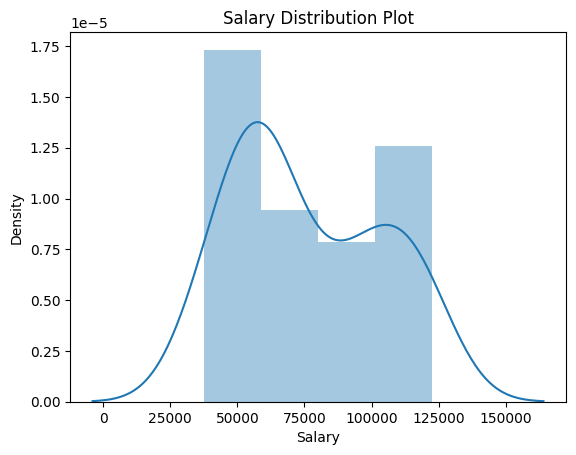

In [ ]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.distplot(df_sal['Salary'])
plt.show()

Distribution plot  menunjukkan variasi sebaran data. Ini mewakili data dengan menggabungkan garis dengan histogram.

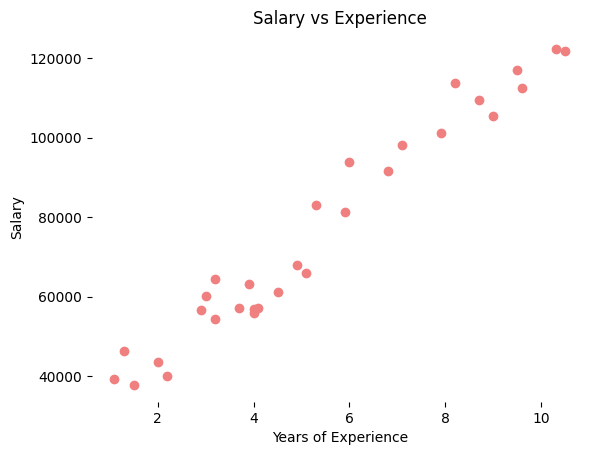

In [ ]:
# Relationship between Salary and Experience
plt.scatter(df_sal['YearsExperience'], df_sal['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

Sekarang terlihat jelas, data yang dimiliki bervariasi secara linier. Artinya, seseorang menerima Gaji lebih banyak seiring bertambahnya Pengalaman.

**Step 4: Membagi dataset menjadi dependent/independent variables**

In [ ]:
# Splitting variables
X = df_sal.iloc[:, :1]  # independent
y = df_sal.iloc[:, 1:]  # dependent

**Step 5: Membuat Model**

In [ ]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [ ]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[9449.96232146]]
Intercept: [25792.20019867]


Persamaan Yang Didapat

Y = 25792.20019867 + (X)*9449.96232146

**Step 6: Mengevaluasi Model**

R^2

In [ ]:
#calculate R-squared of regression model
r_squared = regressor.score(X, y)

#view R-squared value
print(r_squared)

0.9569566641435086


Mean Square Error

In [ ]:
y_pred = regressor.predict(X)


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y, y_pred , squared=False)
rmse

5592.043608760661

**Step 7: Pengecekan Pemenuhan Syarat**

Homoskedastisitas

Goldfeld Quandt Test

1. H0 --> Null Hypothesis: Error terms are homoscedastic
2. H1 --> Alt. Hypothesis: Error terms are heteroscedastic.

In [ ]:
residuals = y.values-y_pred

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X)
lzip(name, test)

[('F statistic', 1.080730670761193), ('p-value', 0.44327931035663354)]

Normality Residual

<ipython-input-25-399e0398f458>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


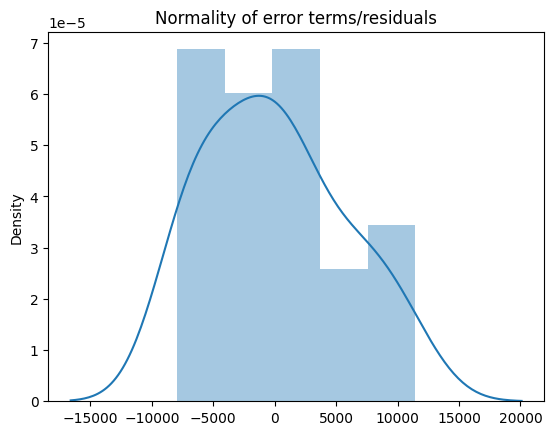

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Independesi Residual (No Autocorrealtion)

Ljungbox test.
1. H0 --> Null Hypothesis: Autocorrelation is absent.
2. H1 --> Alt. Hypothesis: Autocorrelation is present.

In [ ]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(residuals, lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,7.190889,0.206826
